In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressor:
    def __init__(self, learning_rate = 0.01, n_iterations = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.model_parameters = None

    def _y_pred_(self, X, params):
        ones = np.ones(X.shape[0])
        return (np.dot(X,params[:-1]) + np.dot(ones, params[-1])).reshape(-1,1)

    def _error_(self, y_p, y):
        return (sum((y_p - y)**2))[0]/y.shape[0]

    def fit(self, X, y):
        delta = 0.000001
        num_parameters = X.shape[1] + 1
        self.model_parameters = np.random.rand(num_parameters)

        gradients = np.zeros(num_parameters)
        
        for j in range(self.n_iterations):
            for i in range(num_parameters):
                delta_i = np.zeros(num_parameters)
                delta_i[i] += delta
                gradients[i] = (self._error_(self._y_pred_(X,self.model_parameters + delta_i), y) - self._error_(self._y_pred_(X, self.model_parameters),y))/delta
            
            self.model_parameters -= self.learning_rate*gradients
            # print(f"gradients: {gradients}\nmodel parameters:{self.model_parameters}\n")
    
    def predict(self, X):
        ones = np.ones(X.shape[0])
        
        return (np.dot(X,self.model_parameters[:-1]) + np.dot(ones, self.model_parameters[-1])).reshape(-1,1)

    def __repr__(self):
        return f"Model Parameters: {self.model_parameters}"
    

In [137]:
lr = LinearRegressor(learning_rate=0.005, n_iterations=1000)

m = 7
X = 6*np.random.rand(m,2) - 3
y = (4*X[:,0] + 5*X[:,1] + 3 + (np.random.rand(m))/10).reshape(-1,1)

lr.fit(X,y)
lr


Model Parameters: [4.00384323 5.00099418 3.05845248]

In [96]:
# X1 = np.random.randint(-10,10,(10,2))
# X1

In [108]:
m = 200
X = 10*np.random.rand(m,1) - 5
y = 3*X + 5 + 2.5*np.random.randn(m,1)

lr1 = LinearRegressor(0.001, 1000)
lr1.fit(X,y)
lr1



Model Parameters: [3.11546951 4.55956122]

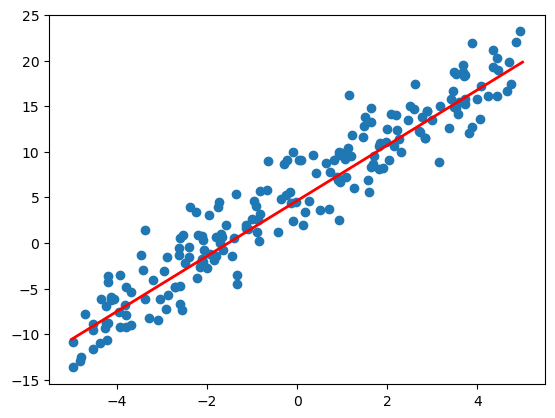

In [102]:
plt.scatter(X,y)

a = [-5, 5]
b = [a[0]*lr1.model_parameters[0] + lr1.model_parameters[1], a[1]*lr1.model_parameters[0] + lr1.model_parameters[1]]
plt.plot(a, b, color='r', linewidth=2)

In [133]:
X = np.random.randint(2, 9, (6,10))

o1 = np.ones(X.shape[0])
np.insert(X,X.shape[1],o1, axis=1)

array([[5, 2, 2, 3, 7, 7, 5, 6, 3, 6, 1],
       [6, 2, 6, 6, 3, 8, 7, 6, 6, 6, 1],
       [7, 8, 3, 7, 8, 4, 5, 4, 2, 2, 1],
       [5, 5, 7, 2, 3, 8, 7, 6, 8, 2, 1],
       [7, 7, 3, 8, 8, 7, 6, 8, 2, 8, 1],
       [3, 5, 4, 6, 4, 7, 7, 3, 3, 4, 1]])